# **Statistical  & Probability Notebook : House Prices - Advanced Regression Techniques**

## **Part 2**

In [1]:
# for basic operations
import numpy as np 
import pandas as pd 

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the data
data = pd.read_csv('/content/sample_data/dataset.csv')

# check the shape of the dataset
data.shape

(1460, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# let's check the columns in the dataset
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

 **Dataset**

I have choosen one of the most famous datasets, **House Prices - Advanced Regression Techniques**, and plotted the statistical and probable analysis for the same, using various theorums.
There are many columns, some of which are:

SalePrice — the property’s sale price in dollars. This is the target variable that we are trying to predict.

LotFrontage — Linear feet of street connected to property

LotArea — Lot size in square feet

Street — Type of road access

LotShape — General shape of property

LandContour — Flatness of the property

Utilities — Type of utilities available

LotConfig — Lot configuration 

## Probability

**Probability can roughly be described as the chance of an event or sequence of events occurring.**

**Experiment** is the uncertain situation, which could have multiple outcomes. A coin toss is an experiment.

**Outcome** is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is “Heads”

**Event** is one or more outcomes from an experiment. “Tails” is one of the possible events for this experiment.

The probability of at least 1 of 2 (or more) things that can not simultaneously occur (mutually exclusive) is the sum of their respective probabilities.

Mutually exclusive is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time.

For any 2 events A & B, the probability that at least one occurs is the sum of their individual probabilities minus the probability of their intersection. i.e

$P(A ∪ B) = P(A) + P(B) − P(A ∩ B)$

### Basic Probability

Probability of picking a house in the Neighborhood - "OldTown" = 
**No. of houses in OldTown / Total no. of houses** 

In [5]:
# lets check the different neighborhoods
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [6]:
# total number of houses in the neighborhood
all_houses = data.shape[0]
print("Total Number of Houses in the Neighborhood :", all_houses)

Total Number of Houses in the Neighborhood : 1460


In [7]:
# total number of houses in the Old town neighborhood
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print("Total Number of Houses in the Old Town Road :", houses_in_OldTown)

Total Number of Houses in the Old Town Road : 113


In [8]:
# lets find the probability of picking a House in the Old Town
probability = (houses_in_OldTown/all_houses)*100
print('Probability of picking a house in OldTown: ',probability,'%')

Probability of picking a house in OldTown:  7.739726027397261 %


### Conditional Probability

Conditional probability is a measure of the probability of an event occurring, given that another event has already occurred. 

If the event of interest is A and the event B is known or assumed to have occurred, "the conditional probability of A given B", or "the probability of A under the condition B", is usually written as P(  A / B).

**GIVEN that we have the probability of picking a house in "OldTown" neighborhood, we go a step further and AGAIN pick a house from the SAME neighborhood ?**

In [9]:
## condtional probability code
cond_prob = (houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1)) 
print("The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is ",cond_prob*100)

The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is  0.5941393523430385


### Normal Distrution

The normal distribution is a continuous probability distribution that is symmetrical on both sides of the mean, so the right side of the center is a mirror image of the left side. The area under the normal distribution curve represents probability and the total area under the curve sums to one.

Askewness in the Target Columns of the data.
Skewness is the state of distribution where the distribution is highly biased towards the right or left side of the plot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


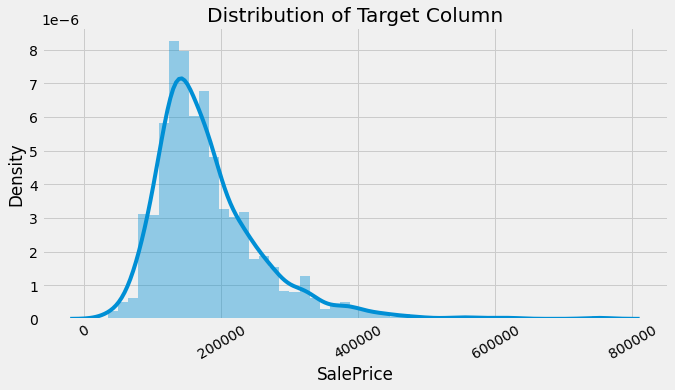

In [10]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(data['SalePrice'])
plt.title('Distribution of Target Column')
plt.show()

**Inference from graph**

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution appears as a bell curve.

The distribution for our target variable SalePrice doesn't resemble a normal distribution, as it is skewed to the right.
If we remove the outliers, it will resemble a Normal Dstribution.

### P Value

In statistical hypothesis testing, the p-value or probability value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.

So now say that we have put a significance (α) = 0.05

This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true

**Are house prices in OldTown really different from the House Prices of Other Neighborhoods?**

In [11]:
# lets import z test from statsmodels
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1 = data[data['Neighborhood'] == 'OldTown']['SalePrice'],
                             value = data['SalePrice'].mean())

# lets print the Results
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

Z-statistic is :-10.639294263334575
P-value is :0.00000000000000000000000001956052602626001826532572


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
